In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
apple=pd.read_csv('Apple 2009-2024.csv')

In [3]:
apple.head(5)

,year,EBITDA (millions),Revenue (millions),Gross Profit (millions),Op Income (millions),Net Income (millions),EPS,Shares Outstanding,Year Close Price,Total Assets (millions),Cash on Hand (millions),Long Term Debt (millions),Total Liabilities (millions),Gross Margin,PE ratio,Employees
0,2024,"$134,661","$391,035","$180,683","$123,216","$93,736",$6.08,"15,408",243.0400,"$364,980","$65,171","$85,750","$308,030",46.21%,39.97,"164,000"
1,2023,"$125,820","$383,285","$169,148","$114,301","$96,995",$6.13,"15,813",191.5919,"$352,583","$61,555","$95,281","$290,437",45.03%,29.84,"161,000"
2,2022,"$130,541","$394,328","$170,782","$119,437","$99,803",$6.11,"16,326",128.5816,"$352,755","$48,304","$98,959","$302,083",43.06%,21.83,"164,000"
3,2021,"$120,233","$365,817","$152,836","$108,949","$94,680",$5.61,"16,865",174.7132,"$351,002","$62,639","$109,106","$287,912",43.02%,28.93,"154,000"
4,2020,"$77,344","$274,515","$104,956","$66,288","$57,411",$3.28,"17,528",129.7556,"$323,888","$90,943","$98,667","$258,549",38.78%,35.14,"147,000"


In [4]:
apple.isnull().sum()

year                            0
EBITDA (millions)               0
Revenue (millions)              0
Gross Profit (millions)         0
Op Income (millions)            0
Net Income (millions)           0
EPS                             0
Shares Outstanding              0
Year Close Price                0
Total Assets (millions)         0
Cash on Hand (millions)         0
Long Term Debt (millions)       0
Total Liabilities (millions)    0
Gross Margin                    0
PE ratio                        0
Employees                       0
dtype: int64

In [9]:
apple.duplicated().sum()

0

In [10]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          16 non-null     int64  
 1   EBITDA (millions)             16 non-null     object 
 2   Revenue (millions)            16 non-null     object 
 3   Gross Profit (millions)       16 non-null     object 
 4   Op Income (millions)          16 non-null     object 
 5   Net Income (millions)         16 non-null     object 
 6   EPS                           16 non-null     object 
 7   Shares Outstanding            16 non-null     object 
 8   Year Close Price              16 non-null     float64
 9   Total Assets (millions)       16 non-null     object 
 10  Cash on Hand (millions)       16 non-null     object 
 11  Long Term Debt (millions)     16 non-null     object 
 12  Total Liabilities (millions)  16 non-null     object 
 13  Gross M

In [12]:
# Convert columns to numeric where necessary
columns_to_clean = [
    'EBITDA (millions)', 'Revenue (millions)', 'Gross Profit (millions)', 
    'Op Income (millions)', 'Net Income (millions)', 'EPS', 
    'Shares Outstanding', 'Total Assets (millions)', 'Cash on Hand (millions)', 
    'Long Term Debt (millions)', 'Total Liabilities (millions)', 'Gross Margin', 
    'Employees'
]
for col in columns_to_clean:
    apple[col] = apple[col].replace('[\$,%,]', '', regex=True).astype(float)

apple['year'] = pd.to_datetime(apple['year'], format='%Y')

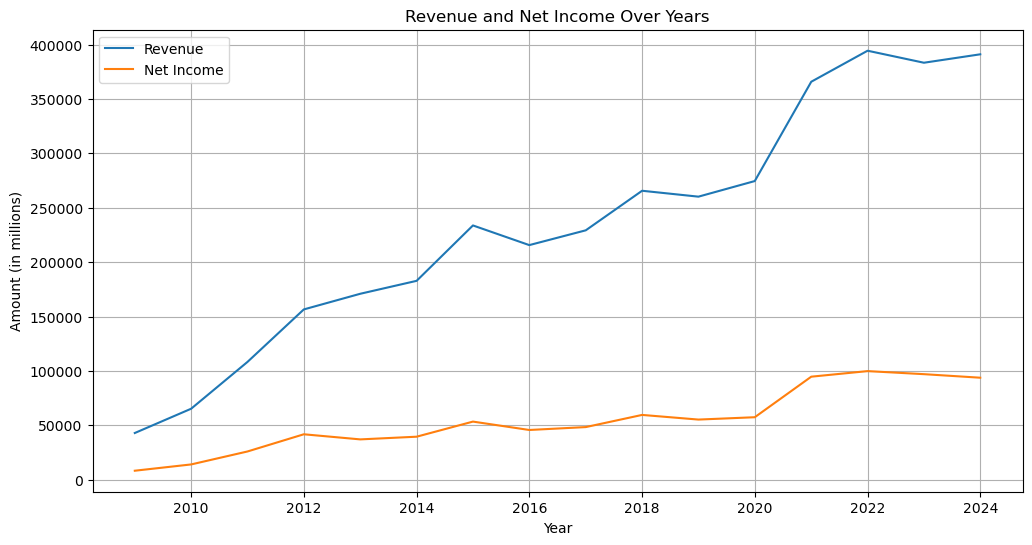

In [16]:
# Plot Revenue and Net Income over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=apple, x='year', y='Revenue (millions)', label='Revenue')
sns.lineplot(data=apple, x='year', y='Net Income (millions)', label='Net Income')
plt.title('Revenue and Net Income Over Years')
plt.xlabel('Year')
plt.ylabel('Amount (in millions)')
plt.legend()
plt.grid()
plt.show()


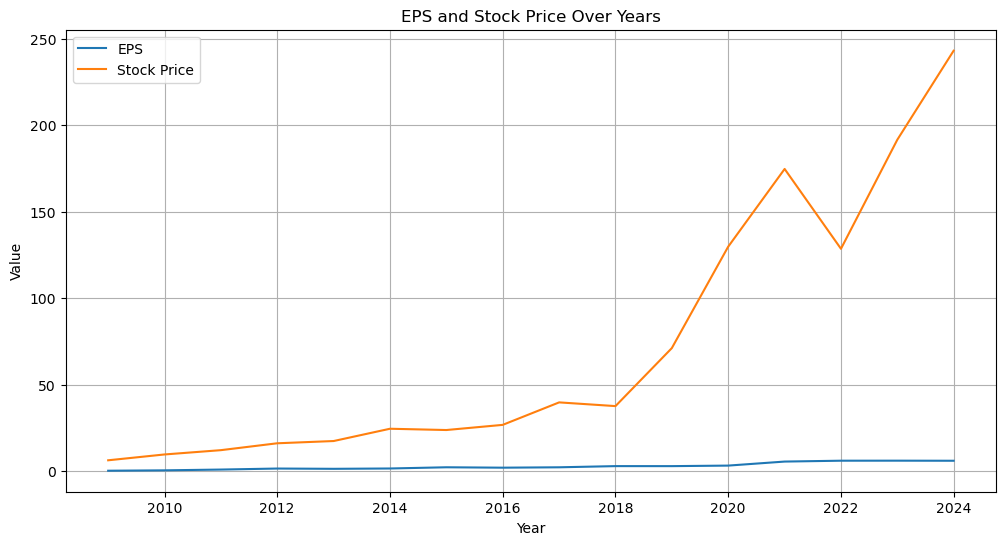

In [18]:
# Plot EPS and Stock Price over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=apple, x='year', y='EPS', label='EPS')
sns.lineplot(data=apple, x='year', y='Year Close Price', label='Stock Price')
plt.title('EPS and Stock Price Over Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


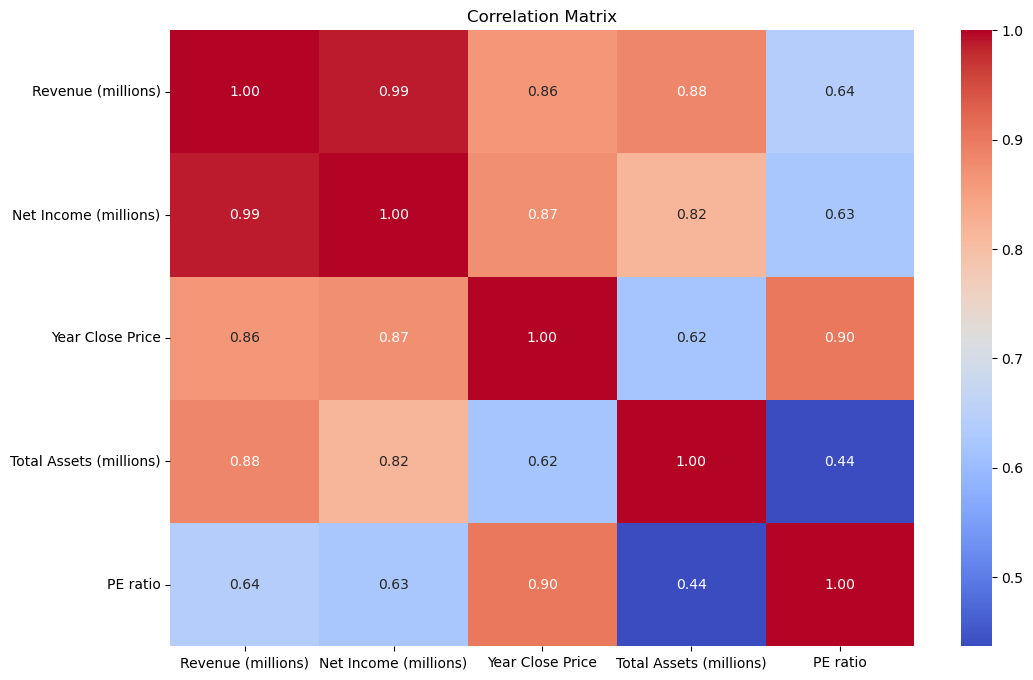

In [20]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr = apple[['Revenue (millions)', 'Net Income (millions)', 'Year Close Price', 
           'Total Assets (millions)', 'PE ratio']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


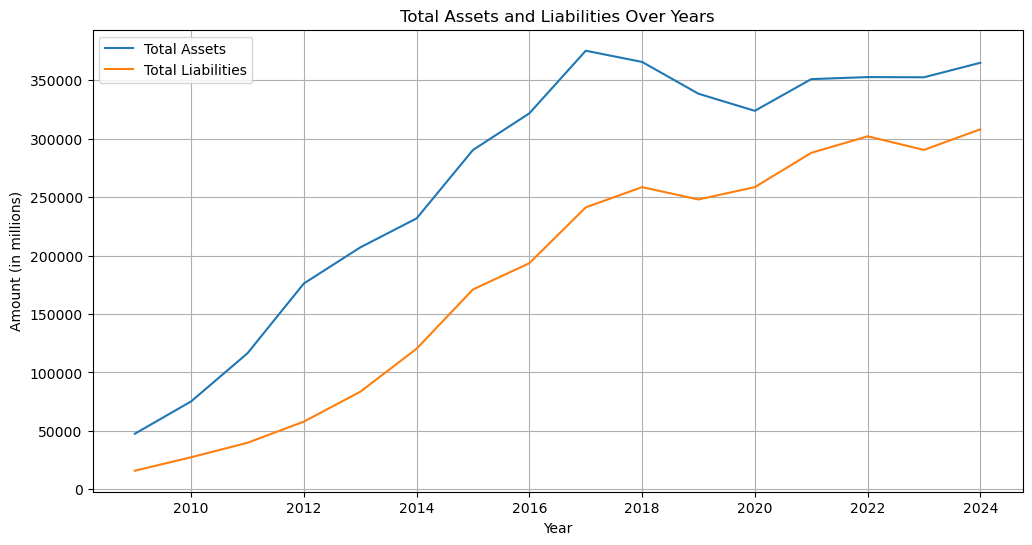

In [21]:
# Plot Total Assets vs. Liabilities
plt.figure(figsize=(12, 6))
sns.lineplot(data=apple, x='year', y='Total Assets (millions)', label='Total Assets')
sns.lineplot(data=apple, x='year', y='Total Liabilities (millions)', label='Total Liabilities')
plt.title('Total Assets and Liabilities Over Years')
plt.xlabel('Year')
plt.ylabel('Amount (in millions)')
plt.legend()
plt.grid()
plt.show()


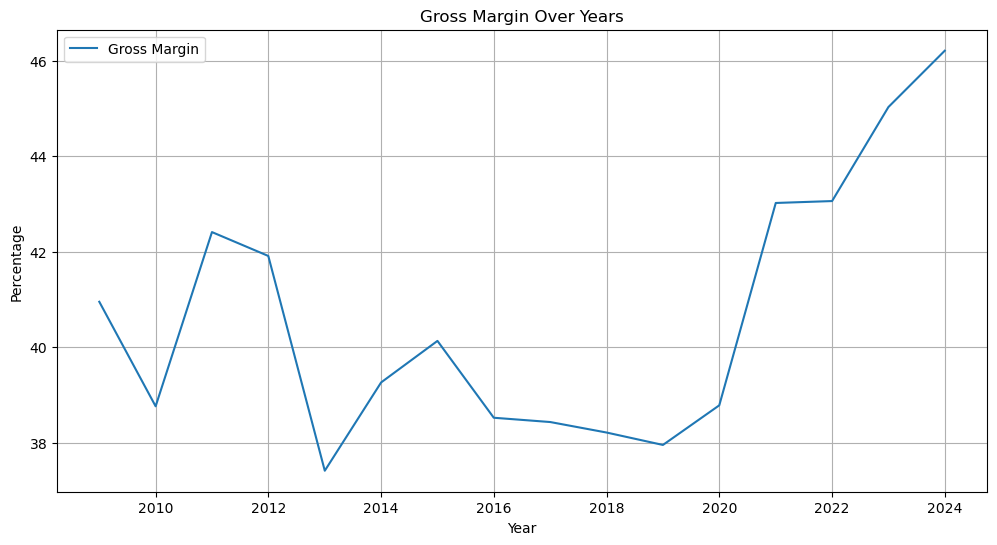

In [22]:
# Plot Gross Margin over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=apple, x='year', y='Gross Margin', label='Gross Margin')
plt.title('Gross Margin Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.grid()
plt.show()


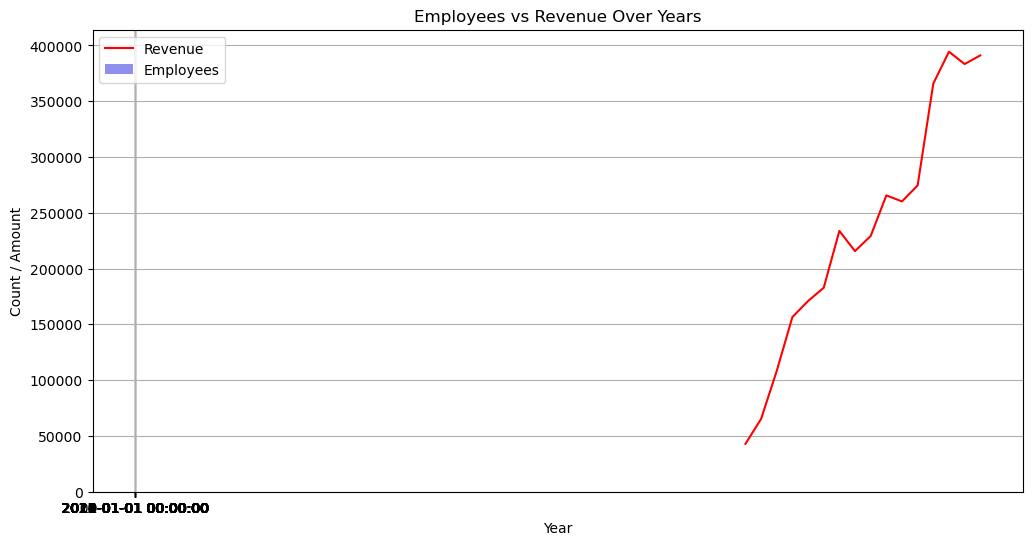

In [23]:
# Plot Employees vs. Revenue
plt.figure(figsize=(12, 6))
sns.barplot(data=apple, x='year', y='Employees', color='blue', alpha=0.5, label='Employees')
sns.lineplot(data=apple, x='year', y='Revenue (millions)', color='red', label='Revenue')
plt.title('Employees vs Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('Count / Amount')
plt.legend()
plt.grid()
plt.show()
